# Task 1 - Prediction using Supervised Learning
## Sarthak  Malik

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
%matplotlib inline

### Getting data 

In [3]:
data = pd.read_csv("http://bit.ly/w-data")

### Inspecting and Visualizing data

In [4]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.shape

(25, 2)

In [7]:
x_data = data[["Hours"]]
y_data = data["Scores"]

In [8]:
x_data.head(5)

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


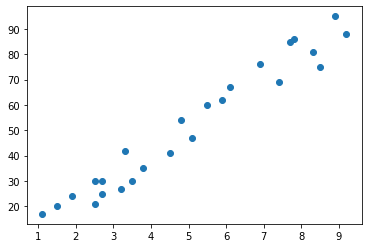

In [9]:
plt.scatter(x_data, y_data)
plt.show()

#### No outliners present . We can proceed without any problem

### Spliting data and training model

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                            test_size=0.2, random_state=0)

In [11]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

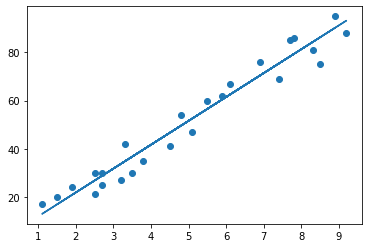

In [12]:
line = regressor.coef_*x_data+regressor.intercept_

plt.scatter(x_data, y_data)
plt.plot(x_data, line);
plt.show()

### Making prediction

In [13]:
y_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [14]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [20]:
req = regressor.predict([[9.25]])

In [21]:
req[0]

93.69173248737539